# 오류 발생 시 참고

1.  오류 코드 아래에 ModuleNotFoundError: No module named 'sklearn' 문제 발생시 아래 코드 실행

In [1]:
!pip install scikit-learn

2.   오류 코드 아래에 FileNotFoundError: [Errno 2] No such file or directory: './train.csv' 문제 발생시



> colab 환경을 환경 중이라면 google drive 연결이 되었는지 확인하고 절대 경로로 "./train.csv" 부분을 변경해주세요



3. 오류 코드 아래에 ModuleNotFoundError: No module named 'matplotlib'문제 발생 시 아래 코드 실행

In [2]:
!pip install matplotlib

# 과제 1. 코드에 주석 달기 (흐름 파악하기)
아래 # (주석처리) 뒤에 해당 코드가 하는 역할을 간단하게 적어주시면 됩니다.


최대한 아는 대로, GPT 도움 없이 하는 것을 권장합니다 ~

* 혹시 코드 실행이 잘 되지 않거나 오류가 발생한다면 중간중간에 있는 print( )  구문이 어디까지 진행되었는지 확인해보세요!

In [3]:
# 라이브러리 불러오기
import pandas as pd # 판다스 - 데이터 분석
import random # 랜덤 - 난수 생성
import os # OS - 경로 설정
import numpy as np # Numpy - 수학 관련
from sklearn.preprocessing import LabelEncoder # 라벨 인코더 - 범주형 데이터를 숫자로 변환
from sklearn.linear_model import LinearRegression # 선형 회귀 모델 - 회귀 분석
from sklearn.model_selection import train_test_split # 학습 데이터와 테스트 데이터로 나누기
from sklearn.metrics import mean_absolute_error # MAE - 모델 평가

# 학습 데이터 불러오기
train = pd.read_csv("./train.csv")

# 학습 데이터와 타겟 변수 분리 - 타겟 변수 monthlyRent(us_dollar)는 y에 저장
# ID와 monthlyRent(us_dollar)를 제외한 모든 변수를 학습 데이터로 사용
# ID는 모델이 monthlyRent(us_dollar)를 예측하는 데 도움이 되지 않는 변수이므로 제외
X = train.drop(columns=['ID', 'monthlyRent(us_dollar)'])
y = train['monthlyRent(us_dollar)']

# 테스트 데이터 불러오기
test = pd.read_csv('./test.csv').drop(columns=['ID'])

# 범주형 데이터 라벨 인코딩
# propertyType, suburbName 두 개의 범주형 데이터를 숫자로 변환
# propertyType은 3개, suburbName은 6개의 범주가 있음
qual_col = ['propertyType', 'suburbName']

for col in qual_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col]) # 학습 데이터에서 변환 기준을 학습하고 변환 진행
    test[col] = le.transform(test[col]) # 테스트 데이터도 동일한 변환 진행
print('Label Encoding Done.')

# 데이터 분할 - 학습 데이터 X와 y를 학습 데이터와 검증 데이터로 나눔
# 학습 데이터: 80%, 검증 데이터: 20%
# random_state는 난수 시드로, 코드를 실행할 때마다 동일한 결과를 얻기 위해 설정
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# 선형 회귀 모델 객체 생성
Model = LinearRegression()

# 모델 학습 - 학습 데이터 X_train, y_train을 이용해 모델 학습
Model.fit(X, y)
print('Model.fit Done.')

# 검증 데이터 예측 - 학습된 모델을 검증 데이터 X_val을 이용해 monthlyRent(us_dollar) 예측
val_preds = Model.predict(X_val)

# 아래는 평가에 대한 코드로 아직 1주차에 포함되지 않는 내용이므로 크게 신경쓰지 않으셔도 됩니다.
# 다만 MAE가 낮을수록 더 좋은 모델이므로 과제 5-2 문제를 풀 때 해당 MAE의 값이 가장 작게 되는 계수를 찾으면 됩니다.
mae = mean_absolute_error(y_val, val_preds)
print(f'MAE: {mae:.4f}')

# 테스트 데이터에 대한 월세 예측 - 학습된 모델을 테스트 데이터에 적용해 월세 예측
preds = Model.predict(test)
print('predict Done.')

# 아래는 대회 제출을 위한 코드로 대회에 코드를 제출하고 싶은 분들만 진행하시면 됩니다.
# 또, 코드 제출하시는 분들은 대회 평가산식이 MAE임을 참고하세요!
# 베이스라인만 시도해도 좋은 결과가 나오니 꼭 대회 제출을 해보는 것을 권장합니다.
submit = pd.read_csv('./sample_submission.csv')
submit['monthlyRent(us_dollar)'] = preds
submit.head()
submit.to_csv('./submit.csv', index=False)

Label Encoding Done.
Model.fit Done.
MAE: 88.7346
predict Done.


# 과제 2. 데이터 파악하기
info( ), describe( ), head( ) 등을 활용하여 train 데이터를 파악해보세요!

* 아래부터는 진행이 어렵다면 GPT를 활용해도 괜찮지만 막히는 부분은 꼭 팀원들의 도움을 받으세요~

In [4]:
train

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
0,Train_0000,Apartment,3,28.638710,77.295822,Delhi East,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Train_0001,Independent Floor,1,28.498940,77.207191,Delhi South,2.486167,13.500583,7.527761,15.877066,83.61,110
2,Train_0002,Independent Floor,3,28.714123,77.154404,Delhi North,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Train_0003,Independent Floor,3,28.704330,77.149956,Other,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Train_0004,Apartment,4,28.577915,77.049446,Dwarka,0.834506,4.288189,15.541840,18.179806,218.32,418
...,...,...,...,...,...,...,...,...,...,...,...,...
8687,Train_8687,Apartment,1,28.602234,77.026001,Dwarka,0.005681,7.776390,18.212199,19.535831,46.45,159
8688,Train_8688,Apartment,1,28.644989,77.169296,Delhi Central,0.007987,12.969368,9.442664,5.039023,81.29,172
8689,Train_8689,Independent Floor,3,28.547377,77.259155,Delhi South,0.203502,17.094466,5.468956,11.109941,148.64,738
8690,Train_8690,Independent Floor,1,28.630501,77.277382,Delhi East,0.248603,20.628700,9.801128,5.679541,41.90,184


In [5]:
# 데이터 타입과 Null 값 개수를 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8692 non-null   object 
 1   propertyType            8692 non-null   object 
 2   bedrooms                8692 non-null   int64  
 3   latitude                8692 non-null   float64
 4   longitude               8692 non-null   float64
 5   suburbName              8692 non-null   object 
 6   distanceMetro(km)       8692 non-null   float64
 7   distanceAirport(km)     8692 non-null   float64
 8   distanceHospital(km)    8692 non-null   float64
 9   distanceRailway(km)     8692 non-null   float64
 10  area(square_meters)     8692 non-null   float64
 11  monthlyRent(us_dollar)  8692 non-null   int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 815.0+ KB


In [6]:
# 수치형 변수의 통계량 확인
train.describe()

,bedrooms,latitude,longitude,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
count,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000
mean,2.119650,28.611199,77.167464,0.869998,13.699359,11.373803,11.419991,101.990737,321.376898
std,0.900757,0.070853,0.093600,1.261337,7.926709,7.500915,7.345131,59.355027,230.962181
min,1.000000,26.467743,76.742523,0.002892,1.901789,0.669150,0.722023,9.290000,14.000000
25%,1.000000,28.563490,77.102028,0.459687,11.152285,8.167231,8.075549,55.740000,159.000000
50%,2.000000,28.616885,77.168053,0.698592,13.139656,10.922441,11.244344,83.610000,258.000000
75%,3.000000,28.651827,77.224998,1.092694,17.225196,15.548549,15.435535,139.350000,393.000000
max,8.000000,28.872597,80.339027,65.866623,396.043067,387.016246,390.969378,882.580000,1476.000000


In [7]:
# 데이터의 상위 10개 행 확인
train.head(10)

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
0,Train_0000,Apartment,3,28.638710,77.295822,Delhi East,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Train_0001,Independent Floor,1,28.498940,77.207191,Delhi South,2.486167,13.500583,7.527761,15.877066,83.61,110
2,Train_0002,Independent Floor,3,28.714123,77.154404,Delhi North,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Train_0003,Independent Floor,3,28.704330,77.149956,Other,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Train_0004,Apartment,4,28.577915,77.049446,Dwarka,0.834506,4.288189,15.541840,18.179806,218.32,418
5,Train_0005,Apartment,2,28.574133,77.161316,Other,1.411980,7.796076,4.619386,9.476784,83.61,688
6,Train_0006,Independent Floor,2,28.740532,77.121490,West Delhi,1.665531,20.886358,21.016495,14.628177,77.30,369
7,Train_0007,Independent Floor,1,28.635586,77.271400,Other,0.797980,20.336494,9.833966,5.003381,22.30,79
8,Train_0008,Apartment,1,28.593672,77.307106,Delhi East,0.751063,22.181923,10.158837,9.986886,37.16,98
9,Train_0009,Independent House,1,28.646322,77.164497,Delhi Central,0.485709,12.791655,9.772431,5.518808,32.52,123


In [8]:
# 데이터 하위 10개 행 확인
train.tail(10)

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
8682,Train_8682,Apartment,3,28.591696,77.064384,Dwarka,1.349292,4.535792,14.298464,16.260610,162.58,356
8683,Train_8683,Independent Floor,1,28.635944,77.272194,Other,0.800902,20.423649,9.913892,5.075101,27.87,110
8684,Train_8684,Independent Floor,2,28.489529,77.180573,Delhi South,1.965982,11.857402,8.975445,17.315929,74.32,123
8685,Train_8685,Apartment,1,28.643642,77.168755,South West Delhi,0.163271,12.820807,9.327578,5.083375,37.16,123
8686,Train_8686,Apartment,2,28.669203,77.101875,West Delhi,1.040521,12.779608,15.361400,12.009594,92.90,196
8687,Train_8687,Apartment,1,28.602234,77.026001,Dwarka,0.005681,7.776390,18.212199,19.535831,46.45,159
8688,Train_8688,Apartment,1,28.644989,77.169296,Delhi Central,0.007987,12.969368,9.442664,5.039023,81.29,172
8689,Train_8689,Independent Floor,3,28.547377,77.259155,Delhi South,0.203502,17.094466,5.468956,11.109941,148.64,738
8690,Train_8690,Independent Floor,1,28.630501,77.277382,Delhi East,0.248603,20.628700,9.801128,5.679541,41.90,184
8691,Train_8691,Independent Floor,2,28.712803,77.138535,Other,1.226364,18.275872,17.535608,11.251435,69.68,319


In [9]:
# 데이터 프레임의 컬럼명 확인
train.columns

Index(['ID', 'propertyType', 'bedrooms', 'latitude', 'longitude', 'suburbName',
       'distanceMetro(km)', 'distanceAirport(km)', 'distanceHospital(km)',
       'distanceRailway(km)', 'area(square_meters)', 'monthlyRent(us_dollar)'],
      dtype='object')

In [10]:
len(train)

8692

In [11]:
# 데이터 크기(행, 열 개수) 확인
train.shape

(8692, 12)

In [12]:
# 데이터 결측치 개수 확인 - 컬럼 별로
train.isnull().sum()

ID                        0
propertyType              0
bedrooms                  0
latitude                  0
longitude                 0
suburbName                0
distanceMetro(km)         0
distanceAirport(km)       0
distanceHospital(km)      0
distanceRailway(km)       0
area(square_meters)       0
monthlyRent(us_dollar)    0
dtype: int64

In [13]:
# 랜덤하게 데이터 5개 출력
train.sample(5)

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
984,Train_0984,Independent Floor,3,28.737656,77.122292,West Delhi,1.612354,20.586275,20.693215,14.338485,102.19,356
2971,Train_2971,Independent Floor,1,28.643162,77.172417,Delhi Central,0.373559,13.013392,9.137403,4.723552,41.81,221
5424,Train_5424,Independent Floor,3,28.635757,77.283882,Other,0.540003,21.447679,10.661860,6.212692,83.61,246
156,Train_0156,Apartment,2,28.531036,77.209099,Delhi Central,0.625224,12.460554,3.972311,12.317129,92.90,430
8226,Train_8226,Apartment,3,28.577473,77.043938,Dwarka,1.135451,4.706031,16.075519,18.695972,154.03,332


# 과제 3. Matplotlib을 활용하여 시각화하기
**3-1. Matplotlib을 활용하여 타켓 변수인 MEDV의 분포를 히스토그램으로 시각화해보세요!**

In [14]:
import matplotlib.pyplot as plt

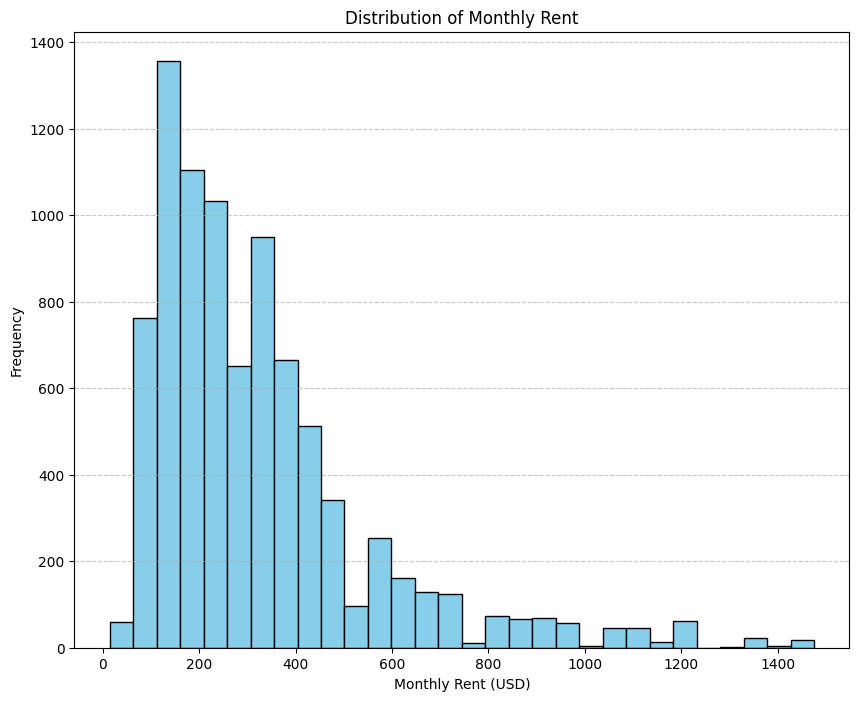

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(train['monthlyRent(us_dollar)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Monthly Rent (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Rent')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**3-1. Matplotlib을 활용하여 히트맵을 그려보세요!**

* seaborn(sns)말고 Matplotlib을 한 번 사용해보세요~

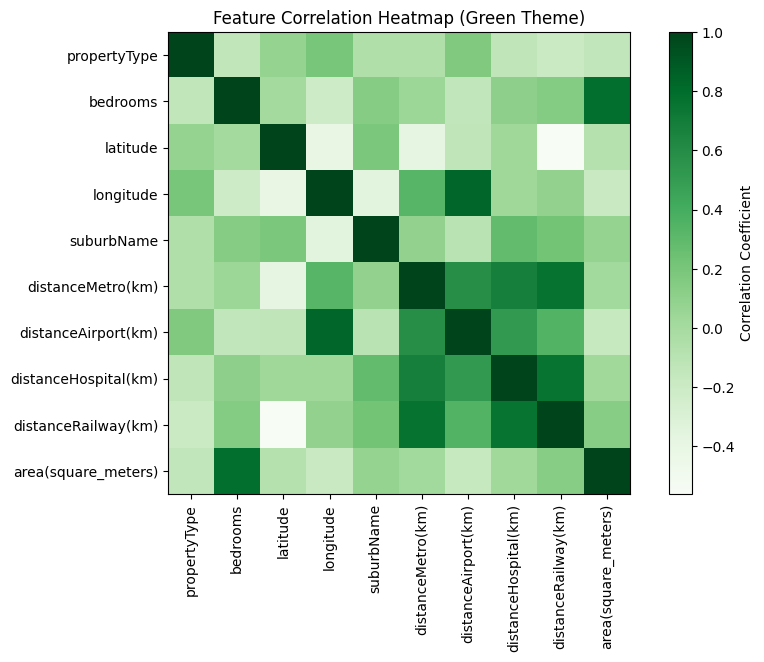

In [16]:
plt.figure(figsize=(10, 6))
correlation_matrix = X.corr()
plt.imshow(correlation_matrix, cmap='Greens', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(ticks=np.arange(len(X.columns)), labels=X.columns, rotation=90)
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns)
plt.title('Feature Correlation Heatmap (Green Theme)')
plt.show()

**3-3. Matplotlib을 활용하여 boxplot을 그려 이상치를 확인보세요!**

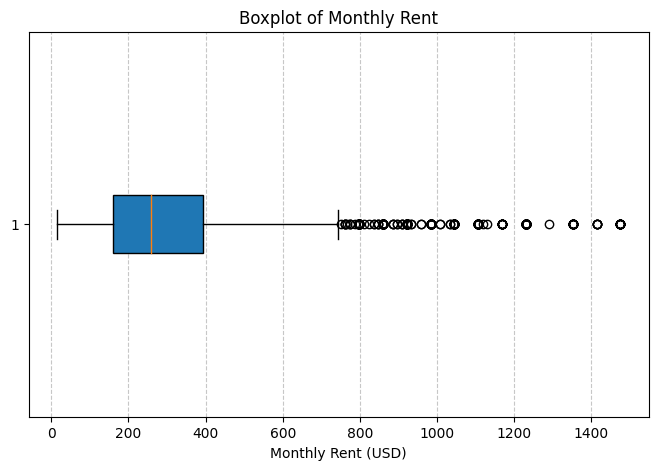

In [17]:
plt.figure(figsize=(8, 5))
plt.boxplot(train['monthlyRent(us_dollar)'], vert=False, patch_artist=True)
plt.xlabel('Monthly Rent (USD)')
plt.title('Boxplot of Monthly Rent')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**3-4. 그 외 시각화해보고 싶은 내용을 자유롭게 진행하시면 됩니다 ~**
* 위에서 작성한 코드에서 색상을 바꾸거나 선 스타일, 선 두께 등 을 바꿔보는 것도 좋습니다!

C:\Users\ljm16\AppData\Local\Temp\ipykernel_3748\899029824.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['monthlyRent(us_dollar)'], shade=True, color='green')


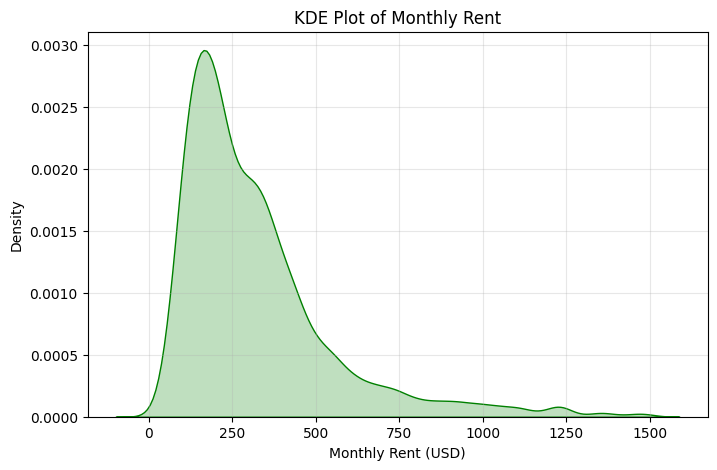

In [18]:
# 월세 데이터의 커널 밀도 추정 그래프
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(train['monthlyRent(us_dollar)'], shade=True, color='green')
plt.xlabel('Monthly Rent (USD)')
plt.ylabel('Density')
plt.title('KDE Plot of Monthly Rent')
plt.grid(alpha=0.3)
plt.show()

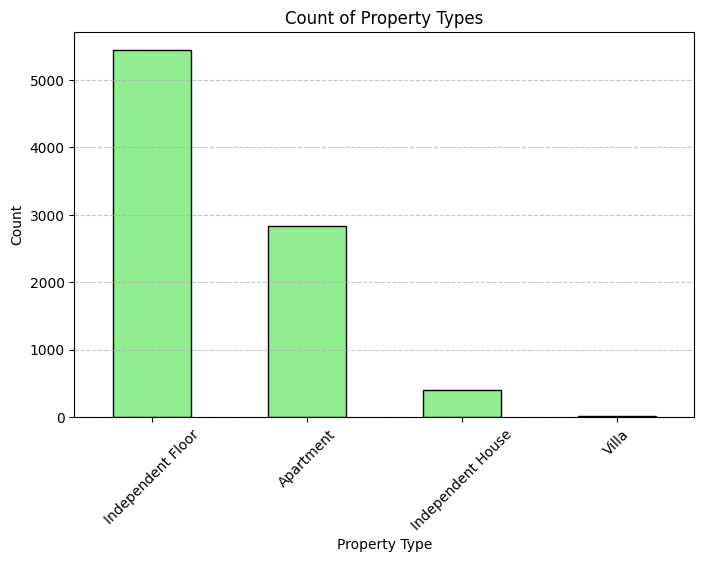

In [19]:
# 각 주거 형태 개수 시각화(범주형 변수)
plt.figure(figsize=(8, 5))
train['propertyType'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Count of Property Types')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\ljm16\AppData\Local\Temp\ipykernel_3748\807498647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train['suburbName'], y=train['monthlyRent(us_dollar)'], palette='Greens')


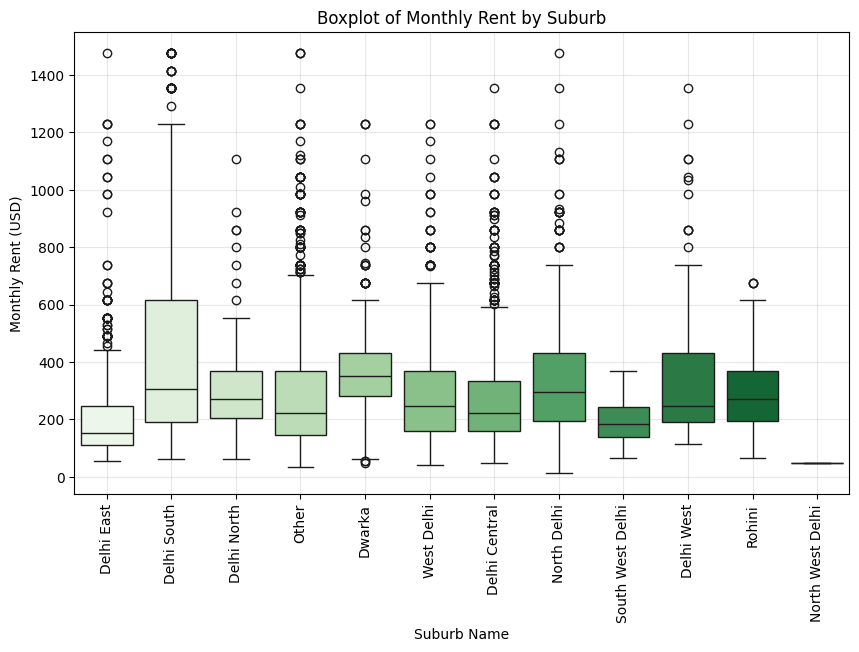

In [20]:
# Boxplot으로 지역별 월세 비교
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['suburbName'], y=train['monthlyRent(us_dollar)'], palette='Greens')
plt.xlabel('Suburb Name')
plt.ylabel('Monthly Rent (USD)')
plt.title('Boxplot of Monthly Rent by Suburb')
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.show()

# 과제 4. 베이스라인의 데이터 인코딩 방법을 바꿔보기

베이스라인의 인코딩 방식: 레이블 인코딩 대신 원핫 인코딩을 사용해보세요!

In [21]:
# 라벨 인코딩 : 범주형 변수를 숫자로 변환 > 모델이 숫자의 크기를 해석할 수도 있음
# 원핫 인코딩 : 모든 범주형 변수를 이진 벡터로 변환 > 숫자의 크기와 관계 없이 모델이 올바르게 학습 가능
import pandas as pd

# 원본 데이터 불러오기
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

# 불필요한 열 제거
X = train.drop(columns=['ID', 'monthlyRent(us_dollar)'])
y = train['monthlyRent(us_dollar)']
test = test.drop(columns=['ID'])

# 범주형 변수 설정
qual_col = ['propertyType', 'suburbName']

# 원-핫 인코딩 적용
X = pd.get_dummies(X, columns=qual_col)
test = pd.get_dummies(test, columns=qual_col)

print("원-핫 인코딩 완료!")
print(f"변환된 X 데이터 크기: {X.shape}")
print(f"변환된 test 데이터 크기: {test.shape}")

원-핫 인코딩 완료!
변환된 X 데이터 크기: (8692, 24)
변환된 test 데이터 크기: (8693, 24)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 검증 데이터 예측
val_preds = model.predict(X_val)

# 평가
mae = mean_absolute_error(y_val, val_preds)
print(f"MAE (One-Hot Encoding 적용): {mae:.4f}")

MAE (One-Hot Encoding 적용): 84.8513


In [23]:
# 테스트 데이터 예측
preds = model.predict(test)

# 제출 파일 생성
submit = pd.read_csv('./sample_submission.csv')
submit['monthlyRent(us_dollar)'] = preds
submit.to_csv('./submit_onehot.csv', index=False)

print("제출 파일 생성 완료! (submit_onehot.csv)")

제출 파일 생성 완료! (submit_onehot.csv)


# 과제 5. 베이스라인의 모델을 바꿔보기
**5-1. 베이스라인의 모델: 선형회귀 대신 다항회귀를 적용해보세요!**

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 다항식 변환을 위한 차수 설정
degree = 2  # 2차 다항 회귀 (필요하면 조정 가능)

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 다항 회귀 모델 파이프라인 생성
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),  # 다항식 변환
    ("linear_regression", LinearRegression())  # 선형 회귀 모델
])

# 모델 학습
poly_model.fit(X_train, y_train)

# 검증 데이터 예측
val_preds = poly_model.predict(X_val)

# 평가
mae = mean_absolute_error(y_val, val_preds)
print(f"MAE (다항 회귀, {degree}차): {mae:.4f}")

MAE (다항 회귀, 2차): 1596215.7120


In [25]:
# 테스트 데이터 예측
test_preds = poly_model.predict(test)

# 제출 파일 생성
submit = pd.read_csv('./sample_submission.csv')
submit['monthlyRent(us_dollar)'] = test_preds
submit.to_csv('./submit_poly.csv', index=False)

print("제출 파일 생성 완료! (submit_poly.csv)")

제출 파일 생성 완료! (submit_poly.csv)


**5-2. 다항회귀의 차수를 바꿔가며 최적의 차수를 찾아보세요!**
* 차수를 너무 높이면 시간이 오래 걸릴 수 있으니 조금씩 높이면서 확인해보세요 !

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 데이터 로드
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

# 불필요한 열 제거
X = train.drop(columns=['ID', 'monthlyRent(us_dollar)'])
y = train['monthlyRent(us_dollar)']
test = test.drop(columns=['ID'])

# 범주형 변수 원-핫 인코딩 적용
qual_col = ['propertyType', 'suburbName']
X = pd.get_dummies(X, columns=qual_col)
test = pd.get_dummies(test, columns=qual_col)

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 최적의 다항 회귀 차수를 찾기 위한 반복 실행
best_degree = 1
best_mae = float("inf")

for degree in range(1, 5):  # 1차 ~ 4차 다항식 시도
    poly_model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("linear_regression", LinearRegression())
    ])

    # 모델 학습
    poly_model.fit(X_train, y_train)

    # 검증 데이터 예측
    val_preds = poly_model.predict(X_val)

    # MAE 계산
    mae = mean_absolute_error(y_val, val_preds)
    print(f"다항 회귀 차수 {degree} -> MAE: {mae:.4f}")

    # 최적 차수 업데이트
    if mae < best_mae:
        best_mae = mae
        best_degree = degree

print(f"\n✅ 최적의 다항 회귀 차수: {best_degree}, 최적 MAE: {best_mae:.4f}")

다항 회귀 차수 1 -> MAE: 84.8513
다항 회귀 차수 2 -> MAE: 1596215.7120
다항 회귀 차수 3 -> MAE: 125633534.0647
다항 회귀 차수 4 -> MAE: 4876944.9988

✅ 최적의 다항 회귀 차수: 1, 최적 MAE: 84.8513


In [27]:
# 최적 차수로 최종 모델 학습
final_poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=best_degree, include_bias=False)),
    ("linear_regression", LinearRegression())
])

final_poly_model.fit(X, y)

# 테스트 데이터 예측
test_preds = final_poly_model.predict(test)

# 제출 파일 생성
submit = pd.read_csv('./sample_submission.csv')
submit['monthlyRent(us_dollar)'] = test_preds
submit.to_csv(f'./submit_poly_degree{best_degree}.csv', index=False)

print(f"최적 차수({best_degree}) 적용 제출 파일 생성 완료! (submit_poly_degree{best_degree}.csv)")

최적 차수(1) 적용 제출 파일 생성 완료! (submit_poly_degree1.csv)


# 과제 6

테스트 데이터와 검증 데이터의 분리 비율을 자유롭게 바꾸고 베이스라인의 MAE와의 결과의 차이점을 확인해보세요.


베이스라인의 분리) 훈련 데이터 : 검증 데이터 = 8:2

In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 데이터 로드
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

# 불필요한 열 제거
X = train.drop(columns=['ID', 'monthlyRent(us_dollar)'])
y = train['monthlyRent(us_dollar)']
test = test.drop(columns=['ID'])

# 범주형 변수 원-핫 인코딩 적용
qual_col = ['propertyType', 'suburbName']
X = pd.get_dummies(X, columns=qual_col)
test = pd.get_dummies(test, columns=qual_col)

# 검증 데이터 비율 목록
test_sizes = [0.2, 0.25, 0.3]  # 20%, 25%, 30%

# 다양한 비율 테스트
for test_size in test_sizes:
    print(f"\n🔹 검증 데이터 비율: {test_size * 100}%")
    
    # 데이터 분할
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)

    # 최적 차수 찾기
    best_degree = 1
    best_mae = float("inf")

    for degree in range(1, 5):  # 1차 ~ 4차 다항 회귀 시도
        poly_model = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("linear_regression", LinearRegression())
        ])

        # 모델 학습
        poly_model.fit(X_train, y_train)

        # 검증 데이터 예측
        val_preds = poly_model.predict(X_val)

        # MAE 계산
        mae = mean_absolute_error(y_val, val_preds)
        print(f"   다항 회귀 차수 {degree} -> MAE: {mae:.4f}")

        # 최적 차수 업데이트
        if mae < best_mae:
            best_mae = mae
            best_degree = degree

    print(f"✅ 최적 차수: {best_degree}, 최적 MAE: {best_mae:.4f}")


🔹 검증 데이터 비율: 20.0%
   다항 회귀 차수 1 -> MAE: 84.8513
   다항 회귀 차수 2 -> MAE: 1596215.7120
   다항 회귀 차수 3 -> MAE: 125633534.0647
   다항 회귀 차수 4 -> MAE: 4876944.9988
✅ 최적 차수: 1, 최적 MAE: 84.8513

🔹 검증 데이터 비율: 25.0%
   다항 회귀 차수 1 -> MAE: 85.1718
   다항 회귀 차수 2 -> MAE: 1137645.5614
   다항 회귀 차수 3 -> MAE: 45182407.9265
   다항 회귀 차수 4 -> MAE: 5460613.5737
✅ 최적 차수: 1, 최적 MAE: 85.1718

🔹 검증 데이터 비율: 30.0%
   다항 회귀 차수 1 -> MAE: 84.2226
   다항 회귀 차수 2 -> MAE: 1627553.2575
   다항 회귀 차수 3 -> MAE: 45824983.6155
   다항 회귀 차수 4 -> MAE: 10389075.6399
✅ 최적 차수: 1, 최적 MAE: 84.2226


In [ ]:
# 최적 차수로 최종 모델 학습
final_poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=best_degree, include_bias=False)),
    ("linear_regression", LinearRegression())
])

final_poly_model.fit(X, y)

# 테스트 데이터 예측
test_preds = final_poly_model.predict(test)

# 제출 파일 생성
submit = pd.read_csv('./sample_submission.csv')
submit['monthlyRent(us_dollar)'] = test_preds
submit.to_csv(f'./submit_poly_best.csv', index=False)

print("최적 차수 적용 제출 파일 생성 완료! (submit_poly_best.csv)")

최적 차수 적용 제출 파일 생성 완료! (submit_poly_best.csv)


# 추가 문제
아래 문제부터는 하고 싶은 사람들만 자율적으로 진행하시면 됩니다!
* 교안에서 선형회귀 개념 내용을 참조하세요

첫번째 코드는 선형회귀 초기값 설정 및 확인입니다. (문제는 아래에)

In [ ]:
#linear regression을 위해 직선 한개를 임의로 세팅합니다.
# w(기울기), b(y 절편)의 초기값 임의로 부여했습니다
import numpy as np
import matplotlib.pyplot as plt

w = 0.45
b = -45
x_plot = np.linspace(145, 200, 120)
y_plot = w*x_plot + b

plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,"r")

**'#' (주석) 뒤에 힌트를 참고하여 비어있는 코드를 작성해보세요!**


총 4문제로 최대한 GPT 도움 없이 교안에 있는 개념을 읽어보며 채워보세요 ~

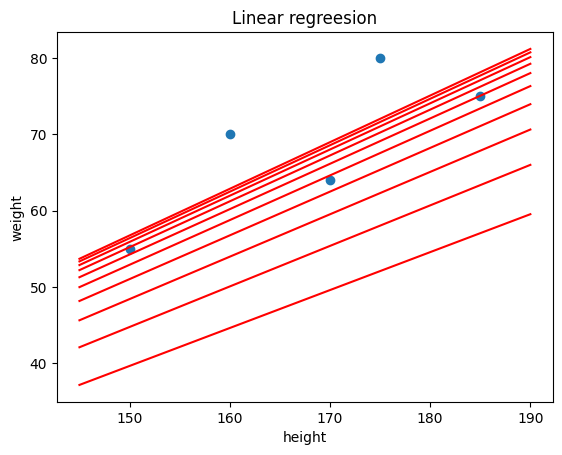

In [31]:
#Linear regression 정리
#지금까지의 과정을 연속적으로 나타내볼게요

import numpy as np
import matplotlib.pyplot as plt
import torch

# 데이터
x = [150, 160, 170, 175, 185]
y = [55, 70, 64, 80, 75]
x_plot = np.linspace(145,190,100)

# 하이퍼파라미터
EPOCH = 10
LR = 1e-6

# 초기 w, b 값 (torch 텐서로 설정)
w = torch.tensor(0.45, requires_grad = True)
b = torch.tensor(-35.0, requires_grad= True)

# 그래프 그리기
plt.plot(x,y,"o")
plt.xlabel("height")
plt.ylabel("weight")
plt.title("Linear regreesion")

# 학습 루프
for _ in range(EPOCH):
    # 기울기 초기화
    w.requires_grad = True
    b.requires_grad = True

    L = 0 # 로스 초기화

    # 각 데이터 포인트에 대한 손실 합산
    for xi,yi in zip(x,y):
        y_pred = w*xi + b # 예측값 계산
        L += (y_pred - yi) ** 2

    L.backward() # 미분해서 w.grad, b.grad 계산

    # 경사하강법으로 업데이트 (detach는 참조를 끊고 새로 텐서를 만들어줌)
    w = (w - LR * w.grad).detach().requires_grad_() # w 업데이트
    b = (b - LR * b.grad).detach().requires_grad_() # b 업데이트

    # 새로운 직선 계산
    y_plot = w.detach().numpy() * x_plot + b.detach().numpy() # w, b, x_plot을 이용한 회귀선

    plt.plot(x_plot, y_plot , "r")

# 파라미터(W,b)가 업데이트 될 때마다 직선을 그어봤습니다.
# 직선이 어떻게 데이터들에 대해 최적화 되는지 보이시나요?

아래 사진 같은 결과가 나오면 성공입니다~

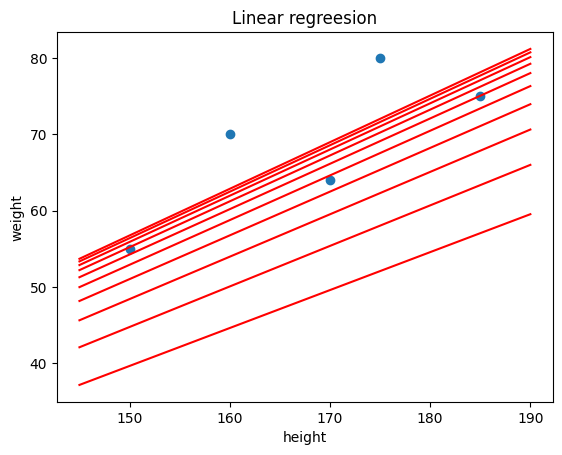